In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, time, datetime
%matplotlib inline

In [2]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.shape

(260601, 2)

In [3]:
train_values = pd.read_csv('train_values.csv', usecols=['building_id', 
                                                        'has_superstructure_adobe_mud', 
                                                        'has_superstructure_mud_mortar_stone', 
                                                        'has_superstructure_stone_flag',
                                                        'has_superstructure_cement_mortar_stone',
                                                        'has_superstructure_mud_mortar_brick',
                                                        'has_superstructure_cement_mortar_brick',
                                                        'has_superstructure_timber',
                                                        'has_superstructure_bamboo', 
                                                        'has_superstructure_other'])
train_values.shape

(34960, 10)

In [4]:
labels_and_values = train_labels.merge(train_values, how='inner')
labels_and_values

,building_id,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_other
0,802906,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28830,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94947,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590882,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,201944,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34955,77542,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34956,675759,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34957,846694,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34958,288435,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
por_daño = labels_and_values.groupby('damage_grade')\
                            .agg({'has_superstructure_adobe_mud':'sum', 
                                  'has_superstructure_mud_mortar_stone':'sum', 
                                  'has_superstructure_stone_flag':'sum',
                                  'has_superstructure_cement_mortar_stone':'sum',
                                  'has_superstructure_mud_mortar_brick':'sum',
                                  'has_superstructure_cement_mortar_brick':'sum',
                                  'has_superstructure_timber':'sum',
                                  'has_superstructure_bamboo':'sum', 
                                  'has_superstructure_other':'sum'})
por_daño = por_daño.T
por_daño.index = ['adobe_mud',
                    'mud_mortar_stone', 
                    'stone_flag',
                    'cement_mortar_stone',
                    'mud_mortar_brick',
                    'cement_mortar_brick',
                    'timber',
                    'bamboo', 
                    'other']
por_daño

damage_grade,1,2,3
adobe_mud,80.0,1822.0,1113.0
mud_mortar_stone,1181.0,15199.0,10269.0
stone_flag,23.0,609.0,552.0
cement_mortar_stone,109.0,420.0,103.0
mud_mortar_brick,82.0,1538.0,673.0
cement_mortar_brick,961.0,1566.0,151.0
timber,977.0,5369.0,2468.0
bamboo,380.0,1930.0,702.0
other,85.0,319.0,125.0


In [6]:
por_daño['edificaciones_por_material'] = por_daño[1] + por_daño[2] + por_daño[3]
por_daño

damage_grade,1,2,3,edificaciones_por_material
adobe_mud,80.0,1822.0,1113.0,3015.0
mud_mortar_stone,1181.0,15199.0,10269.0,26649.0
stone_flag,23.0,609.0,552.0,1184.0
cement_mortar_stone,109.0,420.0,103.0,632.0
mud_mortar_brick,82.0,1538.0,673.0,2293.0
cement_mortar_brick,961.0,1566.0,151.0,2678.0
timber,977.0,5369.0,2468.0,8814.0
bamboo,380.0,1930.0,702.0,3012.0
other,85.0,319.0,125.0,529.0


Text(0, 0.5, 'Material')

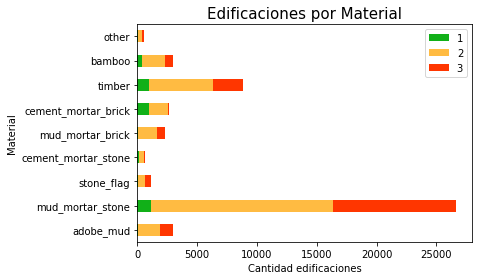

In [17]:
por_daño[[1, 2, 3]].plot(kind="barh", stacked=True, color=['#11b018', '#ffbb42', '#ff3600'])
plt.title("Edificaciones por Material", fontsize=15)
plt.xlabel("Cantidad edificaciones")
plt.ylabel("Material")

In [8]:
por_daño['eficiencia'] = por_daño[1]/por_daño['edificaciones_por_material']
por_daño

damage_grade,1,2,3,edificaciones_por_material,eficiencia
adobe_mud,80.0,1822.0,1113.0,3015.0,0.026534
mud_mortar_stone,1181.0,15199.0,10269.0,26649.0,0.044317
stone_flag,23.0,609.0,552.0,1184.0,0.019426
cement_mortar_stone,109.0,420.0,103.0,632.0,0.172468
mud_mortar_brick,82.0,1538.0,673.0,2293.0,0.035761
cement_mortar_brick,961.0,1566.0,151.0,2678.0,0.358850
timber,977.0,5369.0,2468.0,8814.0,0.110846
bamboo,380.0,1930.0,702.0,3012.0,0.126162
other,85.0,319.0,125.0,529.0,0.160681


In [9]:
por_daño['deficiencia'] = por_daño[3]/por_daño['edificaciones_por_material']
por_daño

damage_grade,1,2,3,edificaciones_por_material,eficiencia,deficiencia
adobe_mud,80.0,1822.0,1113.0,3015.0,0.026534,0.369154
mud_mortar_stone,1181.0,15199.0,10269.0,26649.0,0.044317,0.385343
stone_flag,23.0,609.0,552.0,1184.0,0.019426,0.466216
cement_mortar_stone,109.0,420.0,103.0,632.0,0.172468,0.162975
mud_mortar_brick,82.0,1538.0,673.0,2293.0,0.035761,0.293502
cement_mortar_brick,961.0,1566.0,151.0,2678.0,0.358850,0.056385
timber,977.0,5369.0,2468.0,8814.0,0.110846,0.280009
bamboo,380.0,1930.0,702.0,3012.0,0.126162,0.233068
other,85.0,319.0,125.0,529.0,0.160681,0.236295


In [10]:
por_daño.columns = [1,	2,	3,	'edificaciones_por_material',	'eficiencia',	'deficiencia']
por_daño

,1,2,3,edificaciones_por_material,eficiencia,deficiencia
adobe_mud,80.0,1822.0,1113.0,3015.0,0.026534,0.369154
mud_mortar_stone,1181.0,15199.0,10269.0,26649.0,0.044317,0.385343
stone_flag,23.0,609.0,552.0,1184.0,0.019426,0.466216
cement_mortar_stone,109.0,420.0,103.0,632.0,0.172468,0.162975
mud_mortar_brick,82.0,1538.0,673.0,2293.0,0.035761,0.293502
cement_mortar_brick,961.0,1566.0,151.0,2678.0,0.358850,0.056385
timber,977.0,5369.0,2468.0,8814.0,0.110846,0.280009
bamboo,380.0,1930.0,702.0,3012.0,0.126162,0.233068
other,85.0,319.0,125.0,529.0,0.160681,0.236295


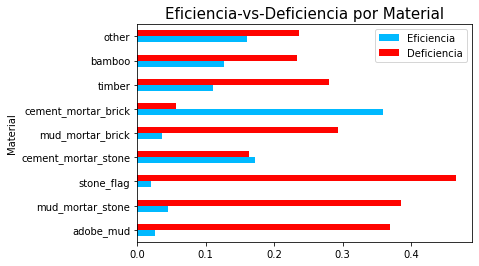

In [22]:
por_daño[['eficiencia', 'deficiencia']].plot(kind="barh", color=['#00B9FF', '#FF0400'])
plt.title("Eficiencia-vs-Deficiencia por Material", fontsize=15)
plt.ylabel("Material")
plt.legend(["Eficiencia", "Deficiencia"])